In [2]:
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

C:\Users\Kamila Nita\AppData\Roaming\Python\Python39\site-packages\pyspark\pandas\__init__.py:49: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [17]:
from pyspark.sql.functions import rank, desc
from pyspark.sql.window import Window

In [3]:
spark = SparkSession.builder.appName('IO').getOrCreate()

In [43]:
summer_athletes = spark.read.csv("Athletes_summer_games.csv", 
                      header='true', 
                      inferSchema='true')

summer_athletes = summer_athletes.withColumn("index_col", summer_athletes["_c0"]).drop("_c0")

summer_athletes = summer_athletes.withColumn("Age", summer_athletes["Age"].cast("int"))
summer_athletes = summer_athletes.withColumn("Year", summer_athletes["Year"].cast("int"))

# Time 4.4s

In [63]:
summer_athletes.show()

# Time 0.1s

+--------------------+---+---+--------------+---+-----------+----+------+-----------+----------+--------------------+------+---------+
|                Name|Sex|Age|          Team|NOC|      Games|Year|Season|       City|     Sport|               Event| Medal|index_col|
+--------------------+---+---+--------------+---+-----------+----+------+-----------+----------+--------------------+------+---------+
|           A Dijiang|  M| 24|         China|CHN|1992 Summer|1992|Summer|  Barcelona|Basketball|Basketball Men's ...|  null|        0|
|            A Lamusi|  M| 23|         China|CHN|2012 Summer|2012|Summer|     London|      Judo|Judo Men's Extra-...|  null|        1|
| Gunnar Nielsen Aaby|  M| 24|       Denmark|DEN|1920 Summer|1920|Summer|  Antwerpen|  Football|Football Men's Fo...|  null|        2|
|Edgar Lindenau Aabye|  M| 34|Denmark/Sweden|DEN|1900 Summer|1900|Summer|      Paris|Tug-Of-War|Tug-Of-War Men's ...|  Gold|        3|
|"Cornelia ""Cor""...|  F| 18|   Netherlands|NED|1932 S

In [64]:
summer_athletes.printSchema()

# Time 0.0s

root
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)
 |-- index_col: integer (nullable = true)



In [17]:
num_row = summer_athletes.count()
num_col = len(summer_athletes.columns)

print("Summer Athletes Data Frame shape: ", num_col, ".", num_row)

# Time 0.2s

Summer Athletes Data Frame shape:  13 . 237673


In [20]:
desc = summer_athletes.describe()

desc.show()

# Time 7.3s

+-------+--------------------+-------------+------------------+--------------------+------------------+-----------+------------------+------------------+------------------+--------------+--------------------+--------------------+------------------+
|summary|                Name|          Sex|               Age|                Team|               NOC|      Games|              Year|            Season|              City|         Sport|               Event|               Medal|         index_col|
+-------+--------------------+-------------+------------------+--------------------+------------------+-----------+------------------+------------------+------------------+--------------+--------------------+--------------------+------------------+
|  count|              237673|       237673|            228486|              237671|            237673|     237673|            237673|            237673|            237673|        237673|              237673|               36871|            237673|
|   

In [29]:
count_value_of_teams = summer_athletes.groupBy("Team").count()
count_value_of_teams = count_value_of_teams.orderBy("count", ascending=False)
count_value_of_teams.printSchema()
count_value_of_teams.show()

# Time 0.6s

root
 |-- Team: string (nullable = true)
 |-- count: long (nullable = false)

+-------------+-----+
|         Team|count|
+-------------+-----+
|United States|15002|
|Great Britain|10842|
|       France|10554|
|        Italy| 8575|
|      Germany| 7960|
|    Australia| 7605|
|       Canada| 7170|
|        Japan| 7020|
|      Hungary| 6326|
|       Sweden| 5987|
|  Netherlands| 5429|
|        Spain| 5259|
|       Poland| 5112|
|        China| 4753|
| Soviet Union| 4584|
|  Switzerland| 4129|
|       Brazil| 4124|
|       Russia| 4088|
|  South Korea| 3922|
|      Romania| 3842|
+-------------+-----+
only showing top 20 rows



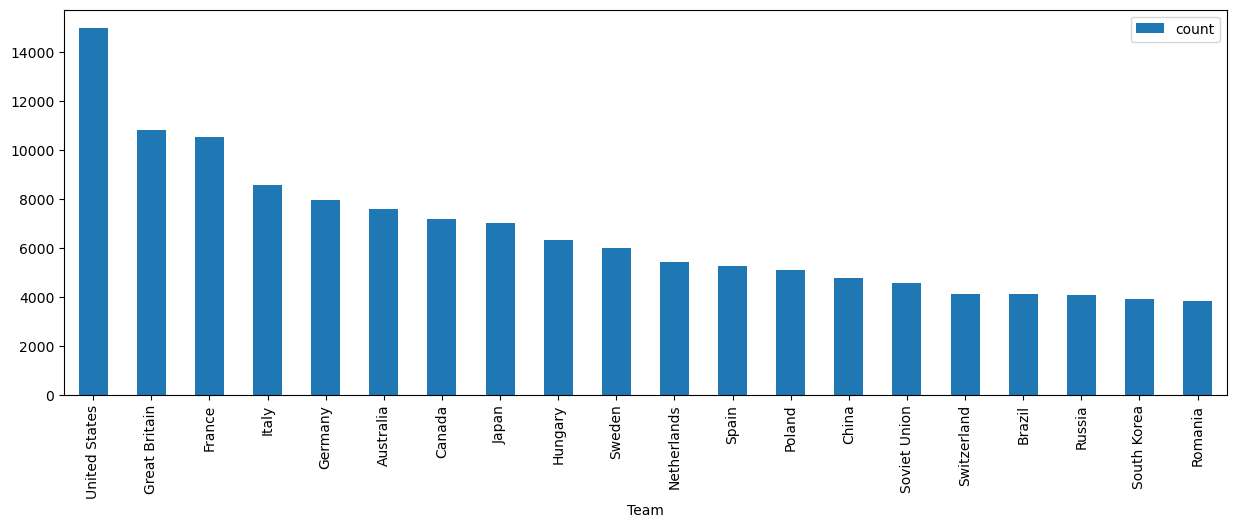

In [31]:
df =  count_value_of_teams.limit(20).toPandas()

df.plot(kind='bar', x='Team', y='count', figsize=(15,5))
plt.show()

# Time 0.7s

<AxesSubplot:>

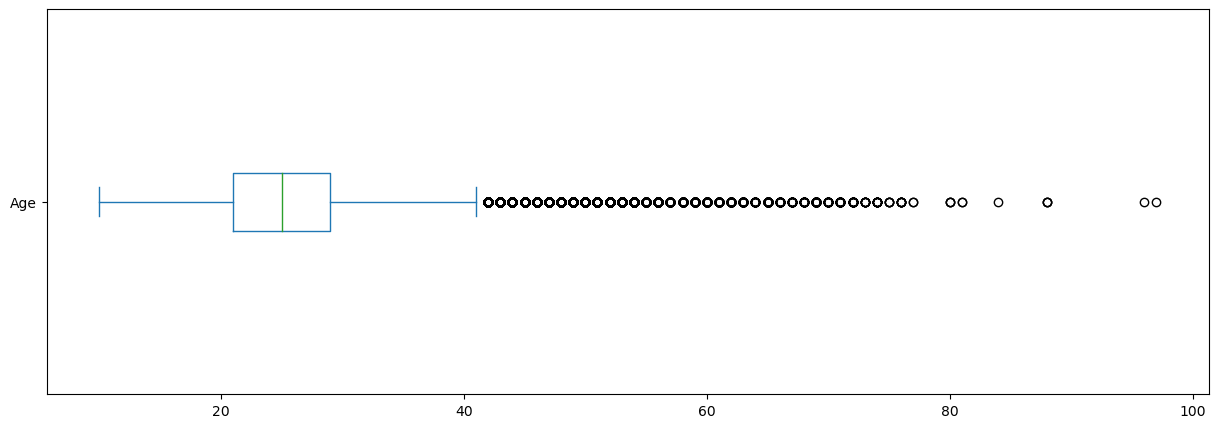

In [49]:
age_of_athletes = summer_athletes.select("Age")

age_of_athletes_pandas = age_of_athletes.toPandas()
age_of_athletes_pandas.plot(kind='box', vert=False, figsize=(15,5))

# Time 1.0s

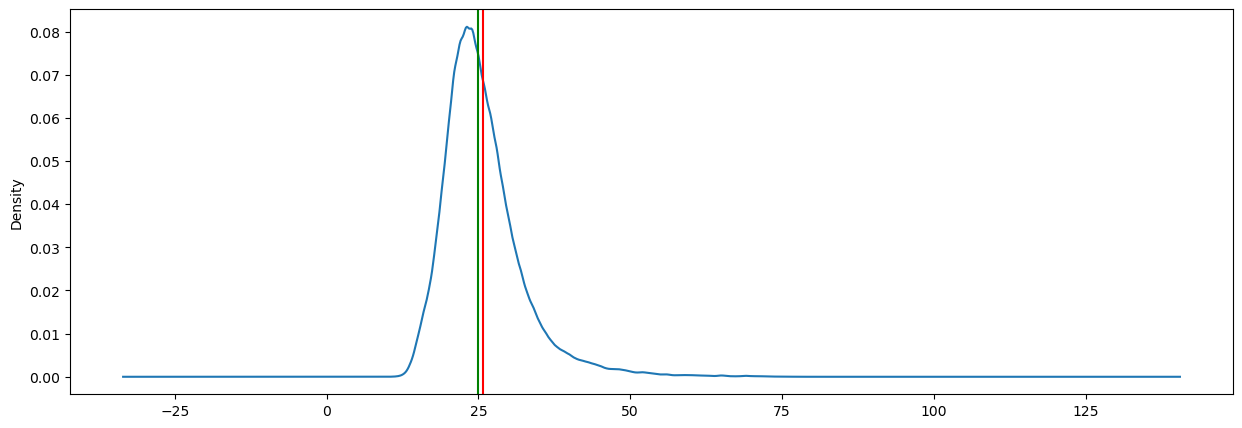

In [47]:
ax = age_of_athletes_pandas['Age'].plot(kind='density', figsize=(15,5))
ax.axvline(age_of_athletes_pandas['Age'].mean(), color='red')
ax.axvline(age_of_athletes_pandas['Age'].median(), color='green')

# Time 8.6s

In [78]:
summer_athletes.agg({'Age':'mean'}).show()

# Time 0.2s

+------------------+
|          avg(Age)|
+------------------+
|25.748993235596032|
+------------------+



In [ ]:
# Median wykonać

In [72]:
summer_athletes.agg({'Age':'min'}).show()

# Time 0.1s

+--------+
|min(Age)|
+--------+
|      10|
+--------+



In [73]:
summer_athletes.where(summer_athletes.Age == 10).show()

# Time 0.3s

+------------------+---+---+--------------------+---+-----------+----+------+------+----------+--------------------+------+---------+
|              Name|Sex|Age|                Team|NOC|      Games|Year|Season|  City|     Sport|               Event| Medal|index_col|
+------------------+---+---+--------------------+---+-----------+----+------+------+----------+--------------------+------+---------+
|Dimitrios Loundras|  M| 10|Ethnikos Gymnasti...|GRE|1896 Summer|1896|Summer|Athina|Gymnastics|Gymnastics Men's ...|Bronze|   142882|
+------------------+---+---+--------------------+---+-----------+----+------+------+----------+--------------------+------+---------+



In [74]:
summer_athletes.agg({'Age':'max'}).show()

# Time 0.1s

+--------+
|max(Age)|
+--------+
|      97|
+--------+



In [75]:
summer_athletes.where(summer_athletes.Age == 97).show()

# Time 0.3s

+--------------------+---+---+-------------+---+-----------+----+------+---------+----------------+--------------------+-----+---------+
|                Name|Sex|Age|         Team|NOC|      Games|Year|Season|     City|           Sport|               Event|Medal|index_col|
+--------------------+---+---+-------------+---+-----------+----+------+---------+----------------+--------------------+-----+---------+
|John Quincy Adams...|  M| 97|United States|USA|1928 Summer|1928|Summer|Amsterdam|Art Competitions|Art Competitions ...| null|   257054|
+--------------------+---+---+-------------+---+-----------+----+------+---------+----------------+--------------------+-----+---------+



+----+--------+
|Year|min(Age)|
+----+--------+
|1896|      10|
|1924|      13|
|1908|      14|
|null|    null|
|1952|      13|
|1956|      13|
|1988|      13|
|1968|      11|
|1904|      14|
|2004|      13|
|1932|      13|
|1996|      12|
|1960|      12|
|2012|      13|
|1912|      13|
|2016|      13|
|1936|      12|
|1920|      13|
|1906|      13|
|1980|      13|
+----+--------+
only showing top 20 rows



<AxesSubplot:xlabel='Year'>

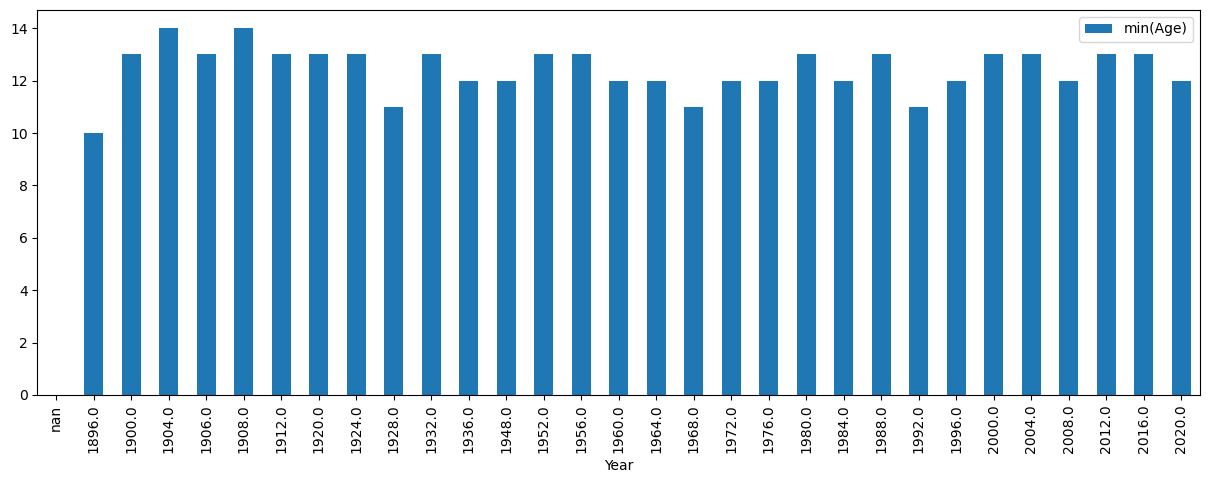

In [87]:
min_age_per_IO = summer_athletes.groupBy("Year", ).min("Age")

min_age_per_IO.show()
min_age_per_IO = min_age_per_IO.orderBy("Year", ascending=True)
min_age_per_IO_pd = min_age_per_IO.toPandas()
min_age_per_IO_pd.plot(kind='bar', x="Year", y="min(Age)", figsize=(15,5))

# Time 0.9s

+----+--------+
|Year|max(Age)|
+----+--------+
|1896|      40|
|1924|      81|
|1908|      61|
|null|    null|
|1952|      65|
|1956|      67|
|1988|      70|
|1968|      68|
|1904|      71|
|2004|      57|
|1932|      96|
|1996|      63|
|1960|      65|
|2012|      71|
|1912|      67|
|2016|      62|
|1936|      74|
|1920|      72|
|1906|      54|
|1980|      70|
+----+--------+
only showing top 20 rows



<AxesSubplot:xlabel='Year'>

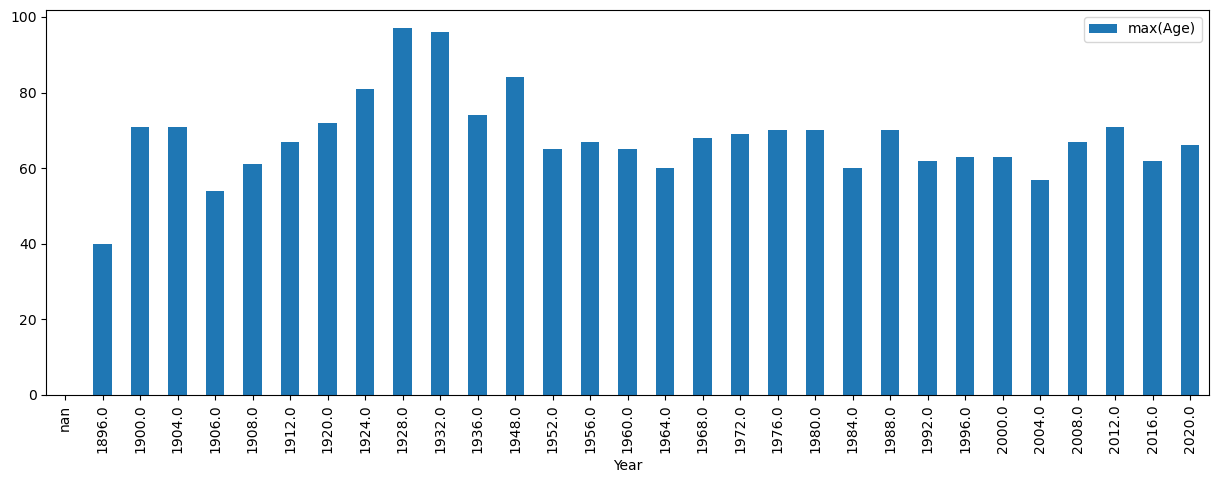

In [89]:
min_age_per_IO = summer_athletes.groupBy("Year", ).max("Age")

min_age_per_IO.show()
min_age_per_IO = min_age_per_IO.orderBy("Year", ascending=True)
min_age_per_IO_pd = min_age_per_IO.toPandas()
min_age_per_IO_pd.plot(kind='bar', x="Year", y="max(Age)", figsize=(15,5))

# Time 0.9s
